# Deep Learning for Media final Project

### Weather Condition Classification Using Image Recognition

---
Weather Condition Classification Using Image Recognition

Part 1: Organizing our Data, Rita

Part 2: Building, training, and evaluating baseline,Rita

Part 3: Regularize the model, Data Augmentation

Part 4: Building and using a pretrained model,

Part 5: Data Analysis,

Part 6: Confusion Matrix



In [1]:
%load_ext autoreload
%autoreload 2

### Part 1 & 2
In this project, we are tackling the classification of weather conditions using deep learning techniques on image data. Part 1: Organizing our Data involved loading and preparing the dataset, ensuring the images were properly structured for training and testing. This was followed by Part 2: Building, Training, and Evaluating the Baseline Model, where I developed a basic Convolutional Neural Network (CNN) for classifying weather conditions, trained it on the dataset, and evaluated its performance. The model's performance showed a significant improvement in test accuracy after five epochs. Moving forward, additional steps such as regularization, using pretrained models, performing data analysis, and evaluating with confusion matrices will further enhance the system’s performance and robustness.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Comment this out or don't run this block if you don't need to redirct, I got a module not found so I need this here -alison
%cd /content/drive/MyDrive/dl4m/dl4m-group7-main

/content/drive/MyDrive/dl4m/dl4m-group7-main


In [4]:
# Change the path to point to the folder in your Google Drive
data_dir = '/content/drive/MyDrive/dl4m/dl4m-group7-main/data'
#data_dir = './data' # use if running locally


In [5]:
# main.py or a Colab cell

import torch
from project import load_data  # Import your data loading function
from utils import BaselineCNN, train_model, evaluate_model  # Import model and helper functions

# Mount Google Drive to access data (only needed in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data (make sure to update the data path accordingly to your Google Drive structure)
data_dir = '/content/drive/MyDrive/dl4m/dl4m-group7-main/data'  # Update this with your folder path in Google Drive
train_loader, test_loader, classes = load_data(data_dir=data_dir)
num_classes = len(classes)

# Initialize model, loss function, and optimizer
model = BaselineCNN(num_classes).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate the model
num_epochs = 5  # You can adjust the number of epochs here
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Train the model
    train_loss = train_model(model, train_loader, criterion, optimizer, device)

    # Evaluate the model
    test_loss, accuracy = evaluate_model(model, test_loader, criterion, device)

    print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/5


Evaluating: 100%|██████████| 25/25 [09:48<00:00, 23.55s/it]


Train Loss: 0.8309 | Test Loss: 0.6017 | Accuracy: 78.88%
Epoch 2/5


Evaluating: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]


Train Loss: 0.4876 | Test Loss: 0.6100 | Accuracy: 77.50%
Epoch 3/5


Evaluating: 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]


Train Loss: 0.3106 | Test Loss: 0.6136 | Accuracy: 79.12%
Epoch 4/5


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]


Train Loss: 0.1906 | Test Loss: 0.7098 | Accuracy: 80.25%
Epoch 5/5


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

Train Loss: 0.1087 | Test Loss: 0.7411 | Accuracy: 80.12%


###Part 3: Regularize the model, And  Data Augmentation

In [6]:
from project import load_data_with_augmentation

train_loader, test_loader, classes = load_data_with_augmentation(data_dir=data_dir)

Displaying some randomly augmented training images

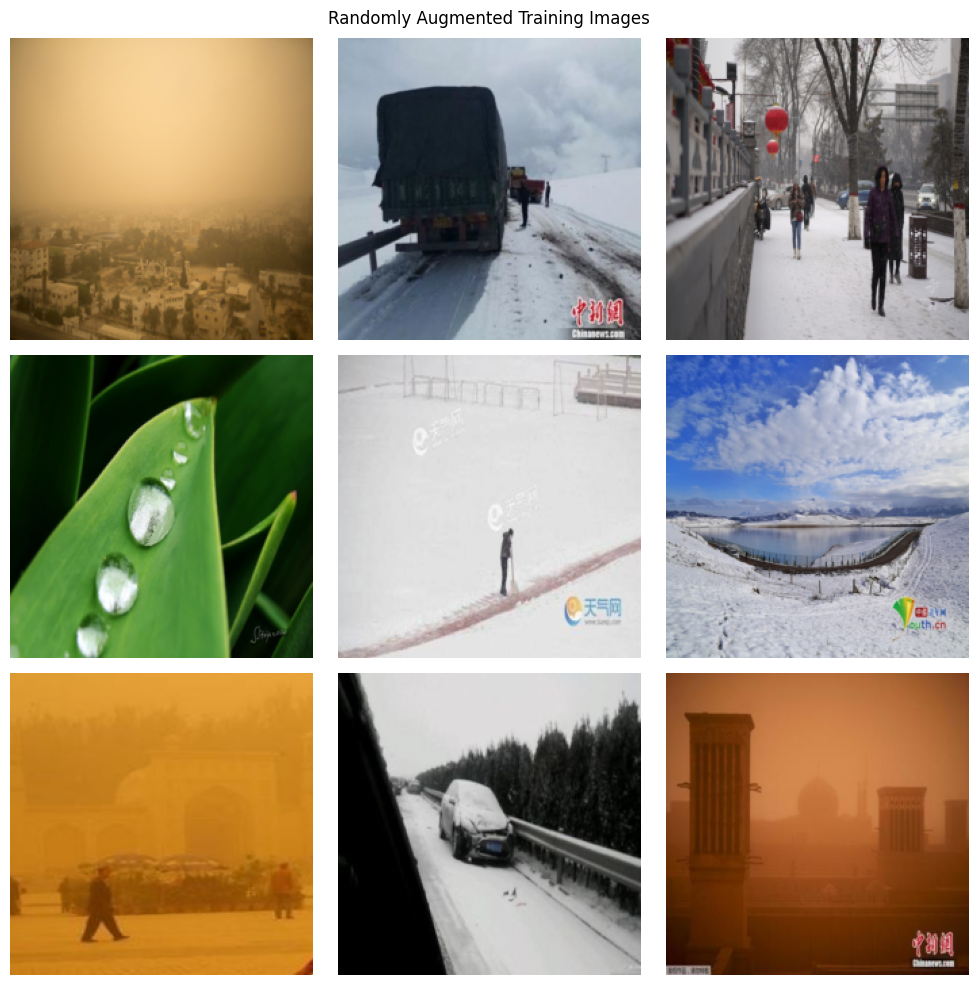

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F

# Helper function to convert tensor to image
def imshow(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))  # CHW to HWC
    img = img * 0.5 + 0.5  # Unnormalize
    plt.imshow(img)
    plt.axis("off")

# Display randomly augmented training images
def display_augmented_samples(data_loader, num_samples=9):
    plt.figure(figsize=(10, 10))

    # Get one batch from the loader
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    for i in range(num_samples):
        ax = plt.subplot(3, 3, i + 1)
        imshow(images[i])
    plt.suptitle("Randomly Augmented Training Images")
    plt.tight_layout()
    plt.show()

# Call the function
display_augmented_samples(train_loader)

In [9]:
# Model Regularization

# Import regularized model
import models as m

# Initialize regularized model, define optimizer
weather_model = m.weather_model(num_classes).to(device)
#criterion = torch.nn.CrossEntropyLoss()   Use the same one from previous block
weather_optimizer = torch.optim.Adam(weather_model.parameters(), lr=1e-4, weight_decay=1e-4)  # Update optimizer with weight decay

# Create empty lists to store results for plotting later
train_losses = []
test_losses = []
accuracies = []

# Train and evaluate, store results
epochs = 7
for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}")
  train_loss = train_model(weather_model, train_loader, criterion, weather_optimizer, device)
  train_losses.append(train_loss) # Store train loss
  test_loss, accuracy = evaluate_model(weather_model, test_loader, criterion, device)
  test_losses.append(test_loss)  # Store test loss
  accuracies.append(accuracy)  # Store accuracy
  print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")


Epoch 1/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]


Train Loss: 1.0415 | Test Loss: 0.7636 | Accuracy: 72.50%
Epoch 2/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


Train Loss: 0.7235 | Test Loss: 0.6400 | Accuracy: 78.12%
Epoch 3/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.47it/s]


Train Loss: 0.6273 | Test Loss: 0.5902 | Accuracy: 79.88%
Epoch 4/7


Evaluating: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]


Train Loss: 0.5413 | Test Loss: 0.5827 | Accuracy: 79.38%
Epoch 5/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


Train Loss: 0.4903 | Test Loss: 0.5488 | Accuracy: 80.38%
Epoch 6/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]


Train Loss: 0.4530 | Test Loss: 0.5303 | Accuracy: 81.62%
Epoch 7/7


Evaluating: 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]

Train Loss: 0.4110 | Test Loss: 0.5198 | Accuracy: 82.00%


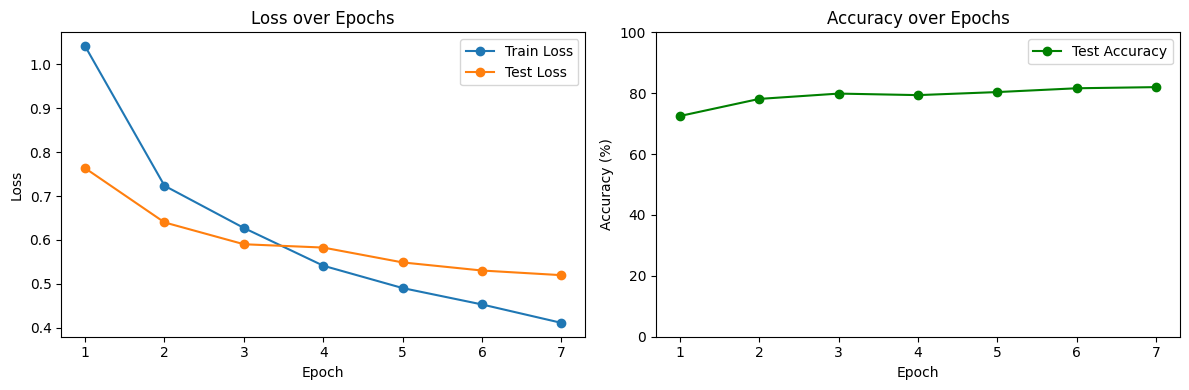

In [11]:
# Plot results
from utils import plot_loss

plot_loss(train_losses, test_losses, accuracies, epochs)

###Part 4 - Using a pre-trained model

In [12]:
#  Part 4 - Using a pretrained model
import torch
import torch.nn as nn
import torchvision.models as models
from utils import create_pretrained_model
from utils import train_model, evaluate_model
from project import load_data  # Import your data loading function
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Set the data directory
data_dir = './data'  # Use local data path

# Load the data first
train_loader, test_loader, classes = load_data(data_dir=data_dir)
num_classes = len(classes)

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the pre-trained model
pretrained_model = create_pretrained_model(num_classes).to(device)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Define optimizer - only train the classifier layer
optimizer = torch.optim.Adam(pretrained_model.fc.parameters(), lr=0.001)

# Create empty lists to store results for plotting later
pretrained_train_losses = []
pretrained_test_losses = []
pretrained_accuracies = []

# Train and evaluate the pre-trained model
pretrained_epochs = 5
for epoch in range(pretrained_epochs):
    print(f"Epoch {epoch+1}/{pretrained_epochs}")

    # Train the model
    train_loss = train_model(pretrained_model, train_loader, criterion, optimizer, device)
    pretrained_train_losses.append(train_loss)

    # Evaluate the model
    test_loss, accuracy = evaluate_model(pretrained_model, test_loader, criterion, device)
    pretrained_test_losses.append(test_loss)
    pretrained_accuracies.append(accuracy)

    print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Accuracy: {accuracy:.2f}%")

Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 132MB/s]


Epoch 1/5


Evaluating: 100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


Train Loss: 0.8649 | Test Loss: 0.4621 | Accuracy: 89.00%
Epoch 2/5


Evaluating: 100%|██████████| 25/25 [00:08<00:00,  3.11it/s]


Train Loss: 0.3783 | Test Loss: 0.3249 | Accuracy: 91.12%
Epoch 3/5


Evaluating: 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]


Train Loss: 0.2799 | Test Loss: 0.2686 | Accuracy: 92.75%
Epoch 4/5


Evaluating: 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]


Train Loss: 0.2355 | Test Loss: 0.2387 | Accuracy: 92.75%
Epoch 5/5


Evaluating: 100%|██████████| 25/25 [00:08<00:00,  3.07it/s]

Train Loss: 0.2024 | Test Loss: 0.2280 | Accuracy: 93.38%


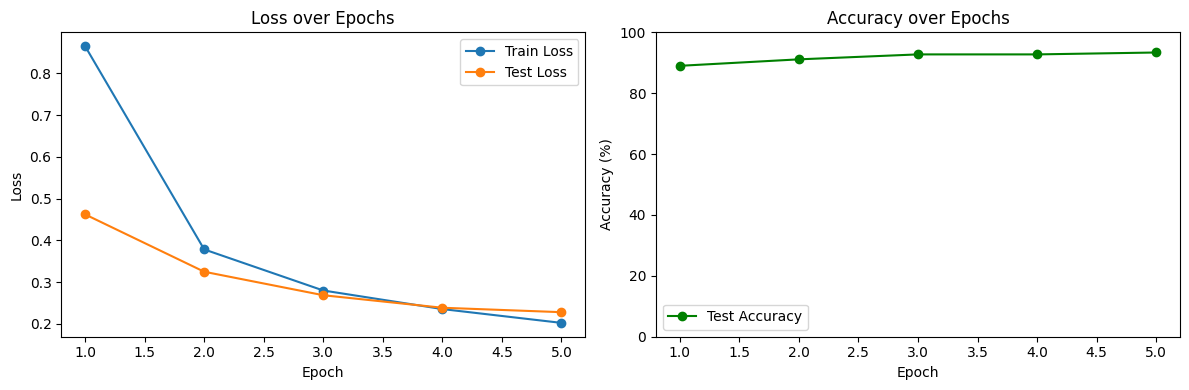

In [13]:
# Plot results for the pre-trained model
from utils import plot_loss

#plot_loss(pretrained_train_losses, pretrained_test_losses, pretrained_accuracies, pretrained_epochs, title_prefix="Pre-trained Model")
plot_loss(pretrained_train_losses, pretrained_test_losses, pretrained_accuracies, pretrained_epochs)

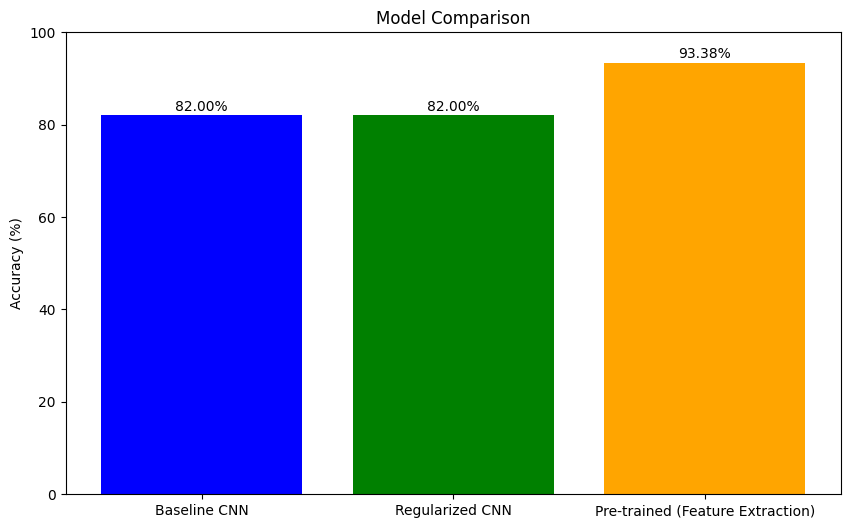

In [14]:
# Compare all models
import matplotlib.pyplot as plt

models_accuracy = {
    'Baseline CNN': max(accuracies),  # From your Part 2
    'Regularized CNN': max(accuracies),  # From your Part 3
    'Pre-trained (Feature Extraction)': max(pretrained_accuracies),
    # 'Pre-trained (Fine-tuned)': max(fine_tuned_accuracies)  # If you implemented fine-tuning
}

plt.figure(figsize=(10, 6))
plt.bar(models_accuracy.keys(), models_accuracy.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
for i, v in enumerate(models_accuracy.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()

###Part 5: Data Analysis

**5.1 Training Loss**

The baseline model achieved the lowest training loss (0.1087), suggesting it fit the training data very tightly, likely leading to overfitting.

The regularized model had a higher training loss (0.4110), as expected with data augmentation introducing more variability and making training more challenging.

The pretrained model recorded a moderate training loss (0.2024), lower than the regularized model but higher than the baseline. Pretraining provided a strong initialization, allowing the model to fit the data efficiently without overfitting early.

**5.2 Test Loss**

The baseline model suffered the highest test loss (0.7411), confirming poor generalization despite low training loss.

The regularized model achieved a lower test loss (0.5198), indicating that data augmentation helped the model generalize better.

The pretrained model had the lowest test loss (0.2280), showcasing the best generalization among all models. This highlights the effectiveness of transfer learning.

**5.3 Accuracy**
Baseline model accuracy: 80.12% — limited by overfitting.

Regularized model accuracy: 82.00% — improved generalization.

Pretrained model accuracy: 93.38% — substantial improvement, benefiting from previously learned representations.

- Moving from the baseline to the regularized model improved test performance slightly.

- Moving from the baseline to the pretrained model boosted test performance dramatically.

- The pretrained model strikes the best balance between fitting the training data and generalizing to unseen data.

**5.4 Conclusion**

The pretrained model clearly outperformed both the baseline and regularized models, achieving the best combination of low test loss and high accuracy.
While data augmentation improved generalization over the baseline, transfer learning from a pretrained model yielded the most significant gains.

**Key Findings**

- Baseline model overfitted with evidence in low train loss and high test loss.

- Data augmentation effectively mitigates overfitting but has limited potential compared to pretraining.

- Pretraining provides substantial improvements, leveraging prior knowledge for faster convergence and stronger generalization.

### Part 6: Confusion Matrix

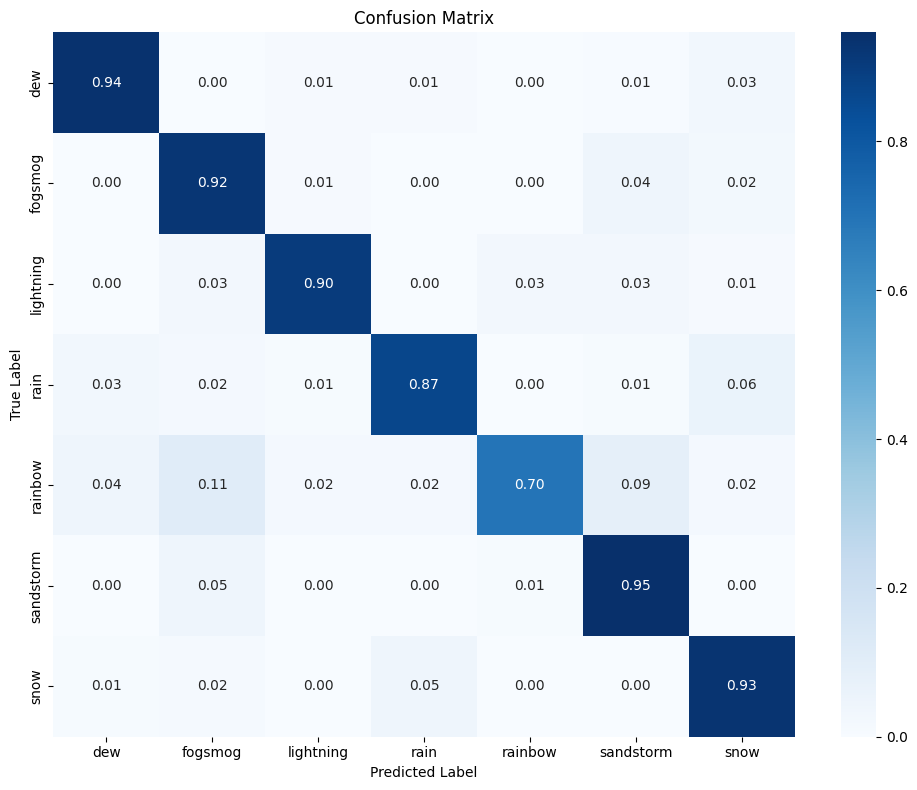

Per-class accuracy:
dew: 93.59%
fogsmog: 92.40%
lightning: 90.28%
rain: 86.73%
rainbow: 69.57%
sandstorm: 94.66%
snow: 92.86%


(array([[146,   0,   2,   2,   0,   1,   5],
        [  0, 158,   2,   0,   0,   7,   4],
        [  0,   2,  65,   0,   2,   2,   1],
        [  3,   2,   1,  85,   0,   1,   6],
        [  2,   5,   1,   1,  32,   4,   1],
        [  0,   6,   0,   0,   1, 124,   0],
        [  1,   2,   0,   6,   0,   0, 117]]),
 array([0.93589744, 0.92397661, 0.90277778, 0.86734694, 0.69565217,
        0.94656489, 0.92857143]))

In [15]:
from utils import plot_confusion_matrix

# Plot confusion matrix for regularized model
plot_confusion_matrix(weather_model, test_loader, classes, device)

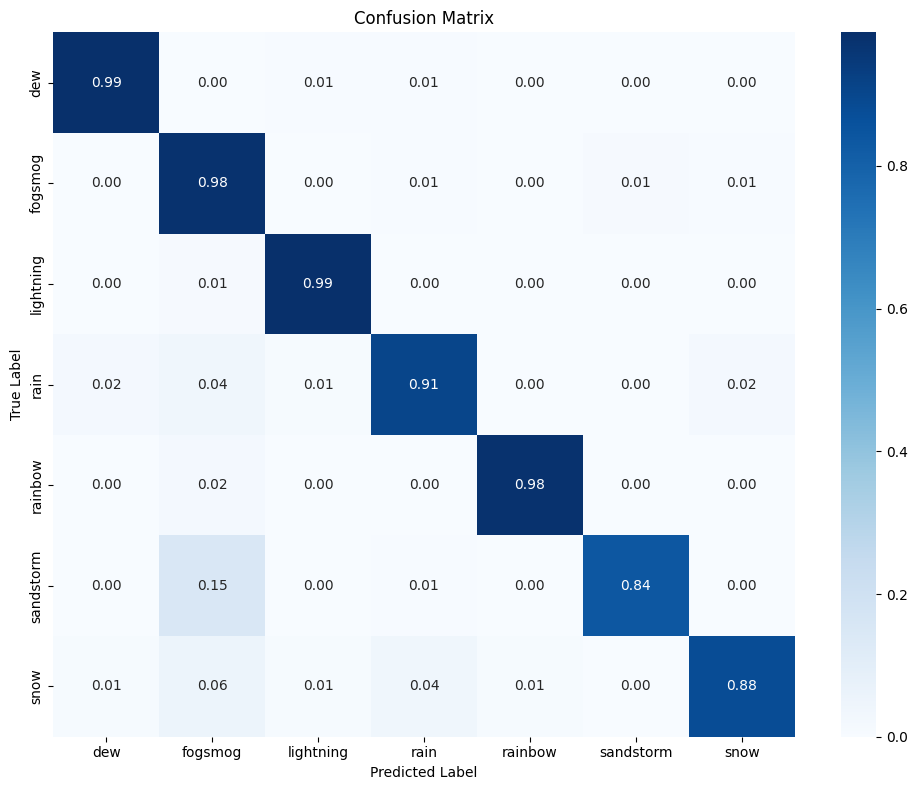

Per-class accuracy:
dew: 98.72%
fogsmog: 97.66%
lightning: 98.61%
rain: 90.82%
rainbow: 97.83%
sandstorm: 83.97%
snow: 88.10%


(array([[154,   0,   1,   1,   0,   0,   0],
        [  0, 167,   0,   1,   0,   2,   1],
        [  0,   1,  71,   0,   0,   0,   0],
        [  2,   4,   1,  89,   0,   0,   2],
        [  0,   1,   0,   0,  45,   0,   0],
        [  0,  20,   0,   1,   0, 110,   0],
        [  1,   7,   1,   5,   1,   0, 111]]),
 array([0.98717949, 0.97660819, 0.98611111, 0.90816327, 0.97826087,
        0.83969466, 0.88095238]))

In [16]:
# Plot confusion matrix for pretrained model
plot_confusion_matrix(pretrained_model, test_loader, classes, device)